
<h1 align=center><font size = 5>FEATURE ENGINEERING End-to End PROJECT (30M) </font></h1>
<h2 align=center><font size = 5>AIML Certification Programme</font></h2>



## Student Name and ID:
Mention your name and ID if done individually<br>
If done as a group,clearly mention the contribution from each group member qualitatively and as a precentage.<br>
1.Ranjana (2024AIML076)



## Business Understanding (1M)

Students are expected to identify a regression problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.

   1. What is the business problem that you are trying to solve?
   
   * I have take up an automobile data which has several attributes that be considered as class, for this project I ll be      trying to predict the price of the automobiles.
   
   2. What data do you need to answer the above problem?What are the different sources of data?
   
   * I have downloaded data from above mentioned source i.e UCI Irvine archive it contains all information i need to build a ML model for automobile Price prediction.
   

## Data Requirements and Data Collection (3+1M)<a id="0"></a>

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DS0103EN/labs/images/lab2_fig1_flowchart_data_requirements.png" width=500>

In the initial data collection stage, data scientists identify and gather the available data resources. These can be in the form of structured, unstructured, and even semi-structured data relevant to the problem domain.

Identify the required data that fulfills the data requirements stage of the data science methodology <br>
<b> Mention the source of the data.(Give the link if you have sourced it from any public data set)
Briefly explain the data set identified .</b>

* Source: https://archive.ics.uci.edu/dataset/10/automobile

* This is an Automobile data with 25 features and 205 instances, I have chosen this particular data as we can apply Regression Analysis on this data for predicting the prices of these vehicles.

* this data is multivariate which will let me apply some feature engineering techniques we have learned in this course.It has some missing values or noisy data.

* Feature variables are both categorical and numerical.

 Import the above data and read it into a data frame 

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, chi2


In [2]:
data = pd.read_csv("D:\RD\BITS -PG_AIML\Course 2 feature Engnn\Project\Dataset\Automobile_data.csv")

Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [3]:
result = pd.concat([data.head(), data.tail()])
print(result)

     symboling normalized-losses         make fuel-type aspiration  \
0            3               150         saab       gas        std   
1            1                 ?  alfa-romero       gas        std   
2            2               137        honda       gas        std   
3            2               121    chevrolet       gas        std   
4            1               101        honda       gas        std   
200          1                 ?      porsche       gas        std   
201          3               150        mazda       gas        std   
202          3               150        mazda       gas        std   
203          3               150        mazda       gas        std   
204          3               150        mazda       gas        std   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
0            two  hatchback          fwd           front        99.1  ...   
1            two  hatchback          rwd           front        94.5  ...  

Get the dimensions of the dataframe.

In [4]:
data.shape

(205, 26)

Display the description and statistical summary of the data.

In [5]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Display the columns and their respective data types.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           205 non-null    int64  
 1   normalized-losses   205 non-null    object 
 2   make                205 non-null    object 
 3   fuel-type           205 non-null    object 
 4   aspiration          205 non-null    object 
 5   num-of-doors        205 non-null    object 
 6   body-style          205 non-null    object 
 7   drive-wheels        205 non-null    object 
 8   engine-location     205 non-null    object 
 9   wheel-base          205 non-null    float64
 10  length              205 non-null    float64
 11  width               205 non-null    float64
 12  height              205 non-null    float64
 13  curb-weight         205 non-null    int64  
 14  engine-type         205 non-null    object 
 15  num-of-cylinders    205 non-null    object 
 16  engine-s

Convert the columns to appropriate data types

In [7]:
# using pd.to_numeric for converting the columns into their appropriate data-types
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'], errors='coerce')
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'], errors='coerce')
data['bore'] = pd.to_numeric(data['bore'], errors='coerce')
data['stroke'] = pd.to_numeric(data['stroke'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           205 non-null    int64  
 1   normalized-losses   164 non-null    float64
 2   make                205 non-null    object 
 3   fuel-type           205 non-null    object 
 4   aspiration          205 non-null    object 
 5   num-of-doors        205 non-null    object 
 6   body-style          205 non-null    object 
 7   drive-wheels        205 non-null    object 
 8   engine-location     205 non-null    object 
 9   wheel-base          205 non-null    float64
 10  length              205 non-null    float64
 11  width               205 non-null    float64
 12  height              205 non-null    float64
 13  curb-weight         205 non-null    int64  
 14  engine-type         205 non-null    object 
 15  num-of-cylinders    205 non-null    object 
 16  engine-s

In [9]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110.0,5250.0,21,28,15040.0
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
3,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
4,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0


#### Write your observations from the above.


* After converting few continous attributes into valid datatypes, there seems to be some null data.
* Data doesnt seem to have any outliers.
* Most of the attributes are performance related and other seems to type or dimensions of automobiles.
* Ther 10 categorical and 16 numerical data attributes

### Check for Data Quality Issues (1.5M)

* duplicate data
* missing data
* data inconsistencies

In [10]:
#Checking for duplicate rows
duplicate_rows = data.duplicated().sum()

#Checking for missing data
missing_data = data.isnull().sum()

#Checking for unique values in categorical columns to identify inconsistencies
categorical_columns = data.select_dtypes(include=['object']).columns
unique_values = {col: data[col].unique() for col in categorical_columns}

print("\nDuplicate rows")
print(duplicate_rows),

print("\n Missing Data")
print(missing_data) 
print("\n Unique Values")
print(unique_values)



Duplicate rows
0

 Missing Data
symboling              0
normalized-losses     41
make                   0
fuel-type              0
aspiration             0
num-of-doors           0
body-style             0
drive-wheels           0
engine-location        0
wheel-base             0
length                 0
width                  0
height                 0
curb-weight            0
engine-type            0
num-of-cylinders       0
engine-size            0
fuel-system            0
bore                   4
stroke                 4
compression-ratio      0
horsepower             2
peak-rpm               2
city-mpg               0
highway-mpg            0
price                  4
dtype: int64

 Unique Values
{'make': array(['saab', 'alfa-romero', 'honda', 'chevrolet', 'dodge', 'plymouth',
       'mitsubishi', 'nissan', 'volkswagen', 'volvo', 'mazda', 'isuzu',
       'toyota', 'audi', 'bmw', 'mercedes-benz', 'peugot', 'renault',
       'jaguar', 'subaru', 'porsche', 'mercury'], dtype=object),

### Handling the data quality issues(1.5M)
Apply techniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies <br>
Give detailed explanation for each column how you handle the data quality issues.


In [11]:
#Handling Data Quality Issues

# normalized-losses- Filling missing values with the column mean 
data['normalized-losses'].fillna(data['normalized-losses'].mean(), inplace=True)
data['bore'].fillna(data['bore'].mean(), inplace=True)
data['stroke'].fillna(data['stroke'].mean(), inplace=True)

# Filling the missing values with the column median 
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)
data['peak-rpm'].fillna(data['peak-rpm'].median(), inplace=True)

# Replacing missing values with the most frequent value (mode)
data['num-of-doors'].fillna(data['num-of-doors'].mode()[0], inplace=True)

# Dropping the missing value in price columnas it is target variable
data.dropna(subset=['price'], inplace=True)


# Verify if all missing values are handled
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   symboling           201 non-null    int64  
 1   normalized-losses   201 non-null    float64
 2   make                201 non-null    object 
 3   fuel-type           201 non-null    object 
 4   aspiration          201 non-null    object 
 5   num-of-doors        201 non-null    object 
 6   body-style          201 non-null    object 
 7   drive-wheels        201 non-null    object 
 8   engine-location     201 non-null    object 
 9   wheel-base          201 non-null    float64
 10  length              201 non-null    float64
 11  width               201 non-null    float64
 12  height              201 non-null    float64
 13  curb-weight         201 non-null    int64  
 14  engine-type         201 non-null    object 
 15  num-of-cylinders    201 non-null    object 
 16  engine-s

* For normalized losses column as its calculated column and replacing it with mean will avoid any kind of biases.
* For bore, stroke columns as the range of numbers is very less i used mean.
* For horsepower, peak-rpm I used median values to as these are performance related metrics and can have skewness.
* For num-of-doors, used mode as this columns is categorical and only has 2 values.
* Also, i dropped the rows where price is missing as price is our target variable.

### Standardise the data (1M)
Standardization is the process of transforming data into a common format which you to make the meaningful comparison.

In [12]:
# Separate numeric and categorical data
# For Numerical columns including continuous and discrete numerical data
# For Categorical columns including string or object data that represent categories

#data to be used for modeling
processed_data = data.copy()

numeric_columns = processed_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = processed_data.select_dtypes(include=['object']).columns

#Standardize the numeric data (Standardization scales the data to have a mean of 0 and a standard deviation of 1)
scaler = StandardScaler()
processed_data[numeric_columns] = scaler.fit_transform(processed_data[numeric_columns])
#processed_data.head()
processed_data[numeric_columns].head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.725050,0.877288,0.050070,1.008748,0.291449,0.955608,0.293277,-0.141775,-2.956916,-3.764741,-0.216341,0.179352,0.275879,-0.652249,-0.395189,0.231211
1,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,-2.433363,0.676031,-0.291435,1.359551,-0.248239,-0.964397,-0.689386,0.415385
2,0.926121,0.469975,-2.015617,-2.408252,-0.948869,-1.214988,-1.633049,-0.841525,-1.573242,0.485712,-0.141247,-1.215429,-0.667532,3.717819,3.429366,-0.848732
3,0.926121,-0.031332,-1.718158,-2.693002,-2.666233,-0.232076,-2.069088,-1.589534,-1.573242,-0.719640,-0.166278,-1.483656,-0.038592,3.405672,3.282268,-1.016255
4,0.127193,-0.657966,-0.842307,-1.968924,-0.901165,-0.477804,-1.392742,-1.155206,-1.573242,-0.592761,-0.016090,-1.161783,0.799996,2.001007,1.664187,-0.984970


### Normalise the data wherever necessary(1M)

In [13]:
#Normalize the numeric data (Normalization scales the data to a range of 0 to 1, making it easier to compare features with different units)
normalizer = MinMaxScaler()
data_normalized = data.copy()
data_normalized[numeric_columns] = normalizer.fit_transform(data[numeric_columns])

### Perform Binning (1M)
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

In [14]:
# Binning
# Here, 'price' is binned into three categories: 'Low', 'Medium', 'High'
price_bins = [0, 10000, 20000, data['price'].max()]
price_labels = ['Low', 'Medium', 'High']

data_binned = data.copy()
data_binned['price_binned'] = pd.cut(data['price'], bins=price_bins, labels=price_labels, include_lowest=True)

### Perform encoding (1M)

In [15]:
#Encoding (Encoding transforms categorical variables into numerical format for ML models)
# One-hot encoding creates binary columns for each category, dropping the first category to avoid redundancy (dummy variable trap)

# Drop the first category to avoid redundancy
ohe = OneHotEncoder(drop='first', sparse_output=False)  
categorical_encoded = ohe.fit_transform(processed_data[categorical_columns])

encoded_columns = ohe.get_feature_names_out(categorical_columns)
categorical_df = pd.DataFrame(categorical_encoded, columns=encoded_columns, index=processed_data.index)


categorical_df.shape

(201, 50)

### Perform Data Discretization(2M)

In [16]:
#Data Discretization(Discretization creates equal-width or equal-frequency bins for numeric features)
#Discretizing the 'horsepower' column into 3 equal-frequency bins
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
data_discretized = data.copy()
data_discretized['horsepower_binned'] = kbins.fit_transform(data[['horsepower']])

In [17]:
# Displaying the first few rows of the discretized data
data_discretized[['horsepower', 'horsepower_binned']].head()

,horsepower,horsepower_binned
0,110.0,1.0
1,154.0,2.0
2,58.0,0.0
3,48.0,0.0
4,60.0,0.0


### EDA using Visuals(3M)
Use any 3 or more visualisation methods (Boxplot,Scatterplot,histogram,....etc) to perform Exploratory data analysis and briefly give interpretations from each visual.


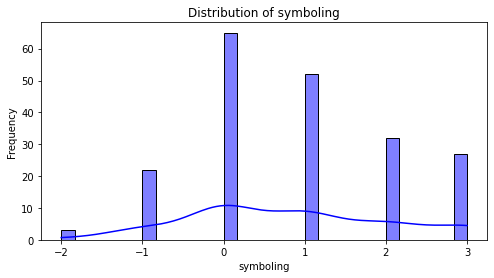

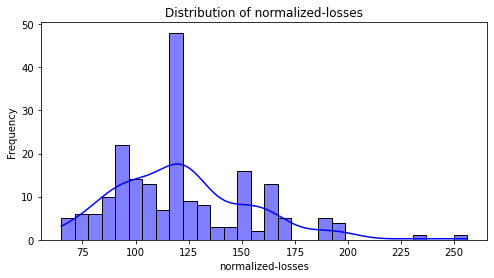

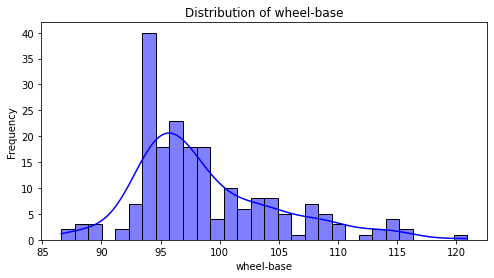

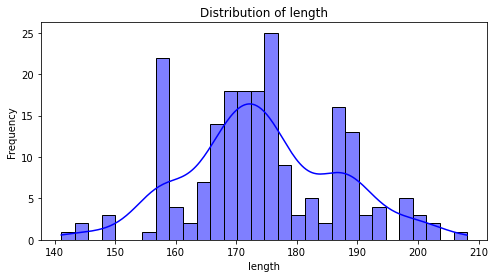

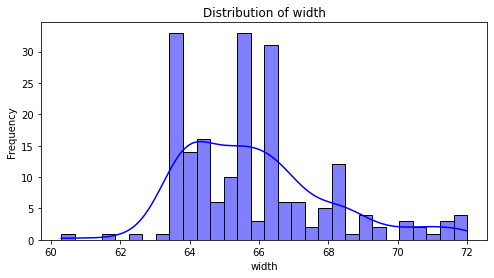

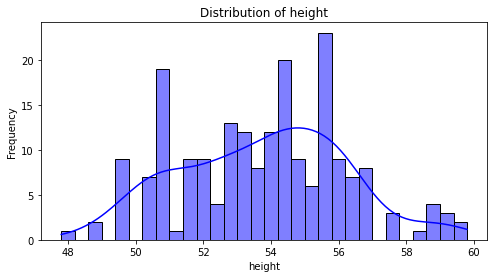

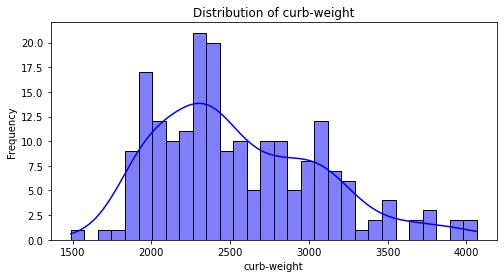

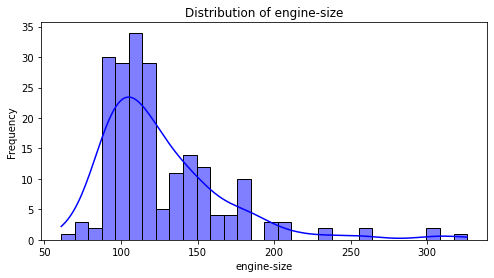

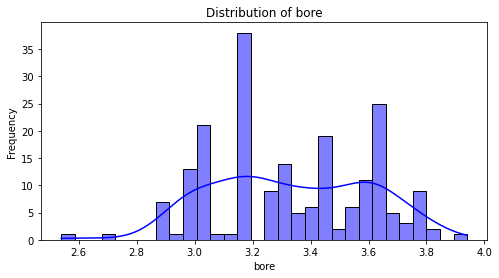

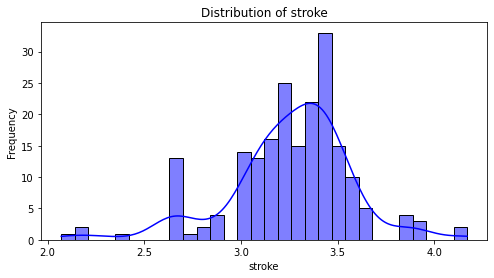

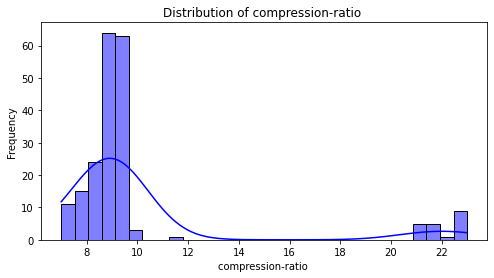

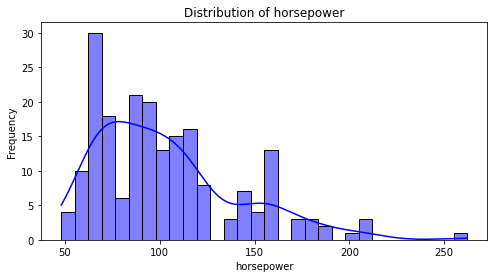

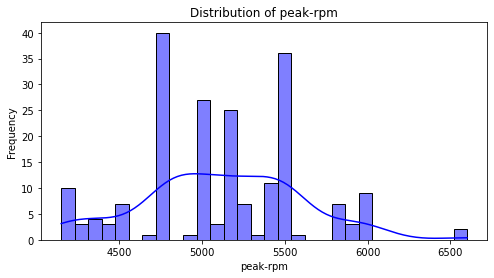

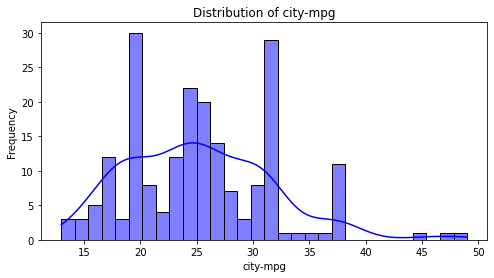

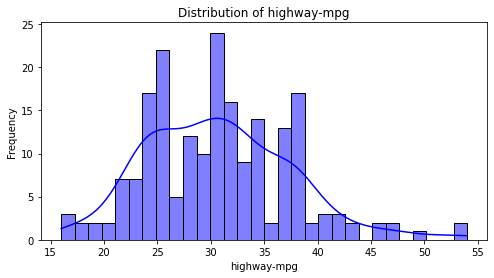

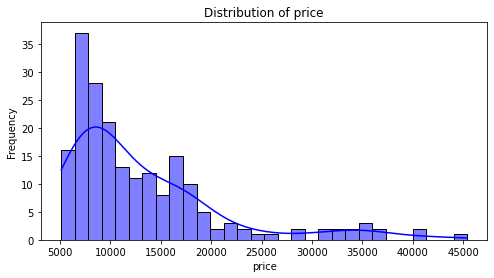

In [18]:
#Exploratory Data Analysis 
# Univariate Analysis: Distribution of numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


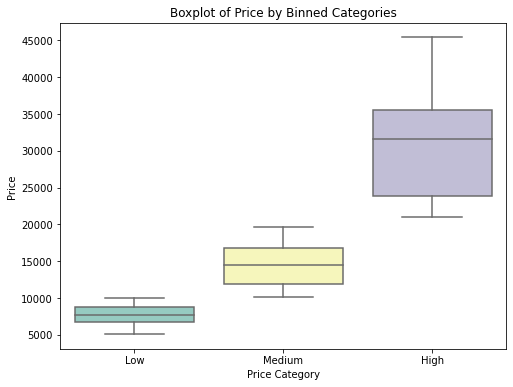

In [19]:
# Boxplot of price by binned categories(Here this can be done for price columns)
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_binned', y='price', data=data_binned, palette='Set3')
plt.title('Boxplot of Price by Binned Categories')
plt.xlabel('Price Category')
plt.ylabel('Price')
plt.show()



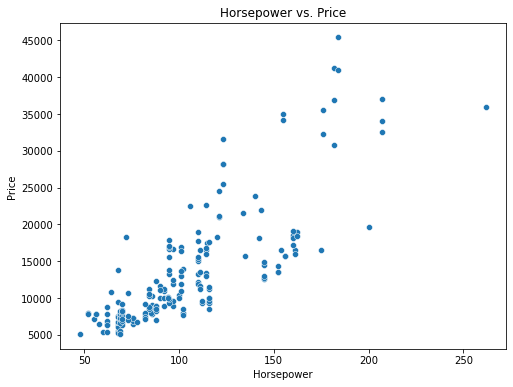

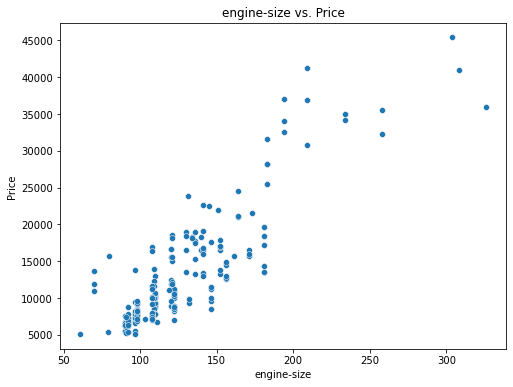

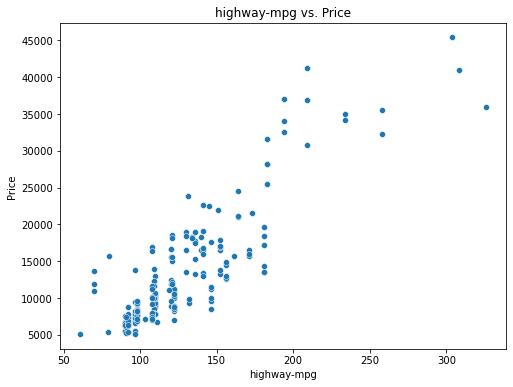

In [20]:
# Scatterplot for selective columns Vs price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='price', data=data)
plt.title('Horsepower vs. Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine-size', y='price', data=data)
plt.title('engine-size vs. Price')
plt.xlabel('engine-size')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine-size', y='price', data=data)
plt.title('highway-mpg vs. Price')
plt.xlabel('highway-mpg')
plt.ylabel('Price')
plt.show()


### Feature Selection(2M)

Apply Univariate filters identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
<br>(From the above 5 you are required to use any <b>two</b>)

In [21]:
# Apply Univariate Filters to Identify Significant Features
# Selecting top 5 significant features based on Mutual Information and Chi-Squared Test

# Mutual Information (Information Gain)(Mutual information evaluates the dependency between features and the target variable)
mi_scores = mutual_info_classif(processed_data[numeric_columns].drop(columns=['price']), data['price'], discrete_features=False)
mi_scores_series = pd.Series(mi_scores, index=processed_data[numeric_columns].drop(columns=['price']).columns)
mi_top_5 = mi_scores_series.nlargest(26)
print("\nTop 5 Features can be selected by Mutual Information:\n")
print(mi_top_5)

#non_zero_mi_features = mi_scores_series[mi_scores_series > 0].index
#data_encoded_selected = data_encoded[non_zero_mi_features]


# Chi-Squared Test(Chi-squared test evaluates whether categorical variables are independent of the target variable)
chi_scores, p_values = chi2(categorical_df, data['price'])
chi_scores_series = pd.Series(chi_scores, index=categorical_df.columns)
chi_top_5 = chi_scores_series.nlargest(66)
print("\nTop 5 Features can be selected by Chi-Squared Test:\n")
print(chi_top_5)


Top 5 Features can be selected by Mutual Information:

wheel-base            1.960030
city-mpg              1.834927
horsepower            1.672344
curb-weight           1.550566
stroke                1.549677
compression-ratio     1.521170
length                1.466018
height                1.427100
bore                  1.385967
engine-size           1.357134
highway-mpg           1.312414
peak-rpm              1.287268
width                 1.270948
symboling             0.659736
normalized-losses     0.530511
dtype: float64

Top 5 Features can be selected by Chi-Squared Test:

num-of-cylinders_three     200.000000
fuel-system_spfi           200.000000
fuel-system_mfi            200.000000
make_mercury               200.000000
num-of-cylinders_twelve    200.000000
make_renault               199.000000
make_isuzu                 199.000000
make_chevrolet             198.000000
fuel-system_4bbl           198.000000
engine-location_rear       198.000000
make_jaguar                198

### Report observations (2M)

Write your observations from the results of each of the above method(1M). Clearly justify your choice of the method.(1M)

### Standardization AND Normalization 
* As we will be using linear regression model, i ll be choosing standardization instead of normalization as most of the data is also normally distributed.
 
### Binning AND Discretization 
* I will not be using binning or discretization as continous data is preferred for linear regression so as per my understanding its not required as we are trying to predict the price of the automobile


### Encoding 
* I will be using encoding here as we have a lot of categorical columns in the data which we need to convert to numerical for regression analysis

### EDA(Exploratory Data Analysis with Visualizations)
* Used 3 visualization out of which histogram and scatterplot seems to be useful as histogram confirmed that most of the data is normally distributed and scatterplot confirmed that there is linear relation between features and target variable

### Feature Selection
* Used Mutual Information or Information Gain for numerical datatypes as it evaluate the predictive power of each feature with respect to the target variable.

* Used chi square for categorical data for feature ranking or selection as it evaluates the statistical dependence between categorical features and the target variable.


### Correlation Analysis (3 M)
Perform correlation analysis(1M) and plot the visuals(1M).Briefly explain each process,why is it used and interpret the result(1M).

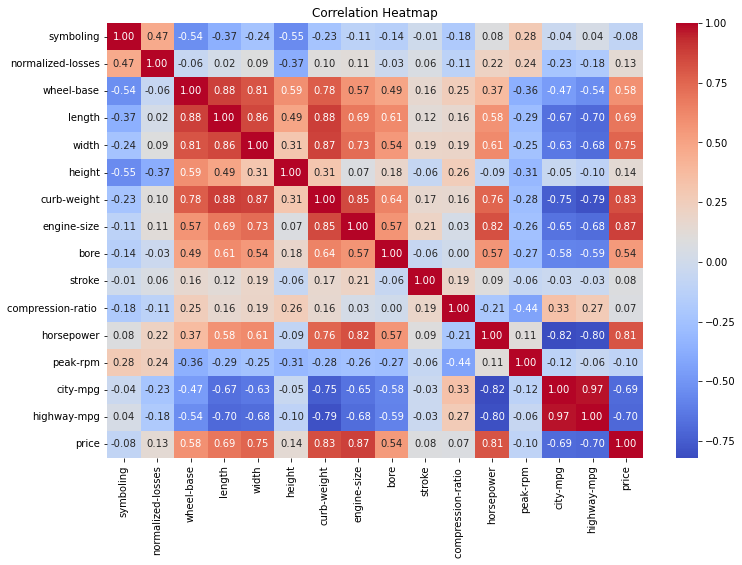

In [22]:
# Bivariate Analysis: Correlation heatmap of numeric columns
plt.figure(figsize=(12, 8))
correlation_matrix = processed_data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### From the correlation heatmap and matrix:

* Highly Correlated Features: 
engine-size vs. price: shows strong positive correlation, implying larger engines are associated with higher prices.
horsepower vs. price: shows a positive correlation since higher horsepower often increases a car's price.

* Weak or No Correlation:
Features like width or length shows a weak or negligible correlation with price, indicating they are less impactful predictors.

* Multicollinearity:
Curb-weight and length ,width are showing multicolinearity so we will drop width & length as curb_weght is one of the 5 features in filter method

engine-size and horsepower are also showing multicolinearity, so we can also drop horsepower as engine-size has greater correlation with price than horsepower.

* Target Relationships:

price tends to correlate strongly with performance-related attributes (e.g., horsepower, engine-size) and moderately with dimensions (e.g., length, width).


* We have few columns which has very low correlation with price like height, stroke, compression-ratio, normalized-losses so we can drop these columns.




In [23]:
#Final dataset
processed_data = pd.concat([processed_data.drop(columns=categorical_columns), categorical_df], axis=1)
final_data = processed_data.copy()


In [24]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 66 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                201 non-null    float64
 1   normalized-losses        201 non-null    float64
 2   wheel-base               201 non-null    float64
 3   length                   201 non-null    float64
 4   width                    201 non-null    float64
 5   height                   201 non-null    float64
 6   curb-weight              201 non-null    float64
 7   engine-size              201 non-null    float64
 8   bore                     201 non-null    float64
 9   stroke                   201 non-null    float64
 10  compression-ratio        201 non-null    float64
 11  horsepower               201 non-null    float64
 12  peak-rpm                 201 non-null    float64
 13  city-mpg                 201 non-null    float64
 14  highway-mpg              2

In [25]:
final_data = final_data.drop(columns = ['symboling', 'normalized-losses', 'height', 'stroke', 'length', 'width', 'horsepower']) 
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   wheel-base               201 non-null    float64
 1   curb-weight              201 non-null    float64
 2   engine-size              201 non-null    float64
 3   bore                     201 non-null    float64
 4   compression-ratio        201 non-null    float64
 5   peak-rpm                 201 non-null    float64
 6   city-mpg                 201 non-null    float64
 7   highway-mpg              201 non-null    float64
 8   price                    201 non-null    float64
 9   make_audi                201 non-null    float64
 10  make_bmw                 201 non-null    float64
 11  make_chevrolet           201 non-null    float64
 12  make_dodge               201 non-null    float64
 13  make_honda               201 non-null    float64
 14  make_isuzu               2

In [26]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,150.0,saab,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110.0,5250.0,21,28,15040.0
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
3,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48.0,5100.0,47,53,5151.0
4,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0


### Model Building and Prediction (4M)

Fit a linear regression model using the most important features identified(1M).Plot the visuals(1M).Briefly explain the regression model,equation (1M) and perform one prediction using the same(1M).

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Drop the target column from features and keep it separately
X = final_data.drop(columns=['price'])
y = data['price']


In [28]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [29]:
# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression()

In [30]:
# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R2 Score): {r2:.2f}")


Mean Squared Error (MSE): 4728972.28
R-Squared (R2 Score): 0.91


In [31]:
print("Predicted Prices:", y_pred)
print("Actual Prices:", y.values)

Predicted Prices: [ 7569.09168276  5720.37163872  4995.48549641 13683.27727347
 12649.22875386  5667.44558521  6214.64059335  9242.92462734
 35550.         22055.50615588  6507.01573299 33105.77657005
 11921.38414724  8393.9288033  20605.82049423 16925.80322276
  9949.52646173  5677.91719254 15697.63903424  5481.25723433
 10638.9397184   7148.45281    13803.47939611  7541.38872542
  5897.61627159  9999.82912025  8263.81080585  5853.17832629
 10922.88124708 13449.91968742  7278.64433264  5318.21344832
 12186.18869693 19066.98345535 11443.78023782  8826.31956458
 39537.3240077  13593.55706833 12392.03073129 18470.06844154
 11733.31681965]
Actual Prices: [15040. 16500.  6479.  5151.  5399.  6529.  7129.  7295.  6855.  7295.
  6377.  5572.  5572.  6229.  6692.  7609.  7609.  6229.  6692.  5389.
  6189.  6669.  7099.  9495. 13845.  7995. 22470.  7775.  6095.  6795.
  5195.  6695.  6575.  6295.  7957.  7957.  8558.  7689.  6488.  6918.
  7898.  5348.  6338.  8778.  7395. 23875.  7349.  7999.

In [32]:
# Display coefficients of features
print(f"Intercept: {regressor.intercept_}")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': regressor.coef_}).sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:")
print(coefficients)


Intercept: 24470.084528807303

Feature Coefficients:
                    Feature   Coefficient
53          fuel-system_idi  7.200662e+03
22             make_porsche  6.643055e+03
9                  make_bmw  5.618915e+03
2               engine-size  4.079060e+03
51         fuel-system_2bbl  4.051622e+03
39     engine-location_rear  4.015475e+03
55         fuel-system_mpfi  3.392899e+03
30         aspiration_turbo  3.167799e+03
16       make_mercedes-benz  2.959689e+03
1               curb-weight  2.663931e+03
8                 make_audi  2.654618e+03
42         engine-type_ohcf  2.592366e+03
7               highway-mpg  2.001025e+03
14              make_jaguar  1.870740e+03
50     num-of-cylinders_two  1.748755e+03
44        engine-type_rotor  1.748755e+03
56         fuel-system_spdi  1.694079e+03
52         fuel-system_4bbl  1.569099e+03
41          engine-type_ohc  1.502470e+03
5                  peak-rpm  1.445235e+03
0                wheel-base  1.303492e+03
48   num-of-cylinders_t

### Observations and Conclusions(1M)

* R2 Score is 0.91 percent which seems to be very good but a high MSE shows that we can still make a lot of improvement in the model.
* Due to Encoding the number of features has increased, I believe we can reduce them by choosing only the most required attributes for linear regression 


###  Solution (1M)

What is the solution that is proposed to solve the business problem discussed in the beginning. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

* Solution- Provided a price prediction model for automobiles.
* Found that price tends to correlate strongly with performance-related attributes (e.g., horsepower, engine-size) and moderately with dimensions (e.g., length, width)
 
* Data encoding increases the number of attributes which i believe is affects the performance of a model
* Selection of encoded model for model buidling seems to be a big challenge here as this dataset has only 201 instances and number of columns after encoding has increased significantly which is affecting model performance.

END